In [ ]:
import csv
import math
import matplotlib.pyplot as plt
from collections import Counter
import heapq


In [ ]:
archivo_csv = '/content/drive/MyDrive/Colab Notebooks/MeIA- Deteccion de Anomalias - Semana 3/MX_ciudades.csv'

La ciudad más frecuente en Lk1st es: ('Allende', 6)
La segunda ciudad más frecuente en Lk2nd es: ('Venustiano Carranza', 7)


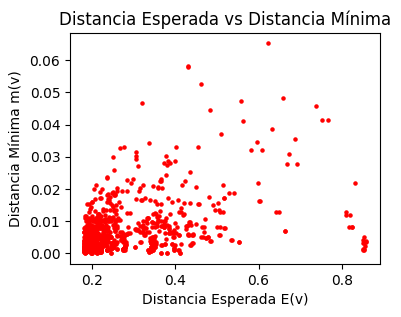

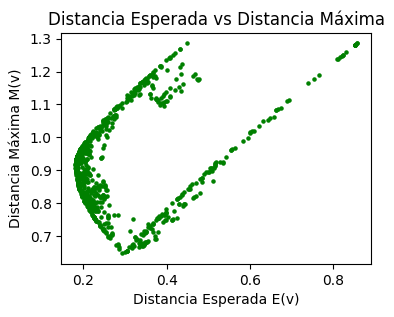

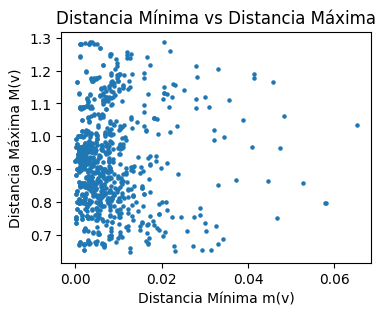

In [ ]:
with open(archivo_csv, 'r') as archivo:
    data = csv.reader(archivo, delimiter='\t')
    datos = list(data)  # Convertir los datos a una lista para acceder a filas específicas

    Lkfirst = []  # Lista para almacenar Kfirst(V) para cada ciudad V
    Lksecond = []  # Lista para almacenar Ksecond(V) para cada ciudad V
    distancias_minimas = []  # Lista para almacenar las distancias mínimas
    distancias_maximas = []  # Lista para almacenar las distancias máximas
    distancias_esperadas = []# Lista para almacenar las distancias esperadas

    for fila in datos:
        x = float(fila[0])
        y = float(fila[1])
        ciudad_actual = fila[2]

        distancias = []  # Lista para almacenar las distancias de la ciudad actual a las demás ciudades

        for otra_fila in datos:
            otra_x = float(otra_fila[0])
            otra_y = float(otra_fila[1])
            otra_ciudad = otra_fila[2]

            # Excluir la ciudad actual
            if otra_ciudad != ciudad_actual:
                # Calcular la distancia euclidiana entre las ciudades
                distancia = math.sqrt((otra_x - x) ** 2 + (otra_y - y) ** 2)

                distancias.append((otra_ciudad, distancia))

        # Encontrar la ciudad con la distancia mínima
        ciudad_minima, distancia_minima = min(distancias, key=lambda x: x[1])
        Lkfirst.append(ciudad_minima)

        # Obtener el segundo mínimo
        #distancias_ordenadas = sorted(distancias, key=lambda x: x[1])
        #print(distancias_ordenadas[0][1],distancias_ordenadas[1][1])

        segundo_minimo = heapq.nsmallest(2, distancias, key=lambda x: x[1])[-1]
        ciudad_segundo_minimo, distancia_segundo_minimo = segundo_minimo
        Lksecond.append(ciudad_segundo_minimo)

        # Encontrar la ciudad con la distancia máxima
        ciudad_maxima, distancia_maxima = max(distancias, key=lambda x: x[1])

        distancias_minimas.append((ciudad_actual, ciudad_minima, distancia_minima))
        distancias_maximas.append((ciudad_actual, ciudad_maxima, distancia_maxima))

        # Calcular la distancia esperada del resto de las ciudades
        distancia_esperada = sum(distancia for _, distancia in distancias) / (len(distancias) or 1)

        distancias_esperadas.append((ciudad_actual, distancia_esperada))


# Nombre del archivo CSV de salida
archivo_salida = 'resultados.csv'


# Abrir el archivo CSV en modo de escritura
with open(archivo_salida, 'w', newline='') as archivo:
   writer = csv.writer(archivo,delimiter='\t')
   # Escribir encabezados
   writer.writerow(['Ciudad', 'Ciudad más cercana', 'Distancia mínima', 'Ciudad más lejana', 'Distancia máxima', 'Distancia esperada'])

  # ********************************************** 1, 2 y 3 retos
  # Imprimir las parejas de ciudades con distancia mínima, máxima y distancia esperada
   for par, par2, par3 in zip(distancias_minimas, distancias_maximas, distancias_esperadas):
       #print(f"Ciudad: {par[0]}, Ciudad más cercana: {par[1]}, Distancia: {par[2]}")
       #print(f"Ciudad: {par2[0]}, Ciudad más lejana: {par2[1]}, Distancia: {par2[2]}")
       #print(f"Ciudad: {par3[0]}, Distancia esperada: {par3[1]}")
       ciudad_actual=par[0]
       ciudad_minima=par[1]
       distancia_minima=par[2]
       ciudad_maxima=par2[1]
       distancia_maxima=par2[2]
       distancia_esperada=par3[1]
       # Escribir los datos en una fila
                #print(ciudad_actual, ciudad_minima, distancia_minima, ciudad_maxima, distancia_maxima, distancia_esperada)
       writer.writerow([ciudad_actual, ciudad_minima, distancia_minima, ciudad_maxima, distancia_maxima, distancia_esperada])



# ********************************************* 7 y 8 retos

# Calcular la ciudad más frecuente en Lkfirst y Lksecond
ciudad_1st_frecuente = Counter(Lkfirst).most_common(1)[0]
ciudad_2nd_frecuente = Counter(Lksecond).most_common(1)[0]

print("La ciudad más frecuente en Lk1st es:", ciudad_1st_frecuente)
#frecuencias = Counter(Lkfirst).most_common(6)  # Obtener los 3 elementos más frecuentes
#for ciudad, frecuencia in frecuencias:
#    print(ciudad, frecuencia)

print("La segunda ciudad más frecuente en Lk2nd es:", ciudad_2nd_frecuente)
#frecuencias2 = Counter(Lksecond).most_common(6)  # Obtener los 3 elementos más frecuentes
#for ciudad, frecuencia in frecuencias2:
#    print(ciudad, frecuencia)


# ********************************************* 4, 5 y 6 retos


# Graficar las distancias esperadas y mínimas
ciudades = [par[0] for par in distancias_esperadas]
distancias_esperadas_valores = [par[1] for par in distancias_esperadas]
distancias_minimas_valores = [par[2] for par in distancias_minimas]
distancias_maximas_valores = [par[2] for par in distancias_maximas]

plt.figure(figsize=(4, 3))
plt.scatter(distancias_esperadas_valores, distancias_minimas_valores, s=5,c='red')
plt.xlabel('Distancia Esperada E(v)')
plt.ylabel('Distancia Mínima m(v)')
plt.title('Distancia Esperada vs Distancia Mínima')
plt.show()

# Graficar las distancias esperadas y máximas

plt.figure(figsize=(4, 3))
plt.scatter(distancias_esperadas_valores, distancias_maximas_valores, s=5,c='green')
plt.xlabel('Distancia Esperada E(v)')
plt.ylabel('Distancia Máxima M(v)')
plt.title('Distancia Esperada vs Distancia Máxima')
plt.show()

# Graficar las distancias máximas y mínimas
plt.figure(figsize=(4, 3))
plt.scatter(distancias_minimas_valores, distancias_maximas_valores, s=5)
plt.xlabel('Distancia Mínima m(v)')
plt.ylabel('Distancia Máxima M(v)')
plt.title('Distancia Mínima vs Distancia Máxima')
plt.show()
